# 1. Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Generasi Gigih/tugas/Tugas Book Review/book_rev5.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101415 entries, 0 to 101414
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               101415 non-null  object 
 1   author              101415 non-null  object 
 2   publisher           101415 non-null  object 
 3   page                101415 non-null  int64  
 4   language            101415 non-null  object 
 5   discount_rate       101415 non-null  object 
 6   discounted_price    101414 non-null  object 
 7   price               101414 non-null  object 
 8   rating              101415 non-null  int64  
 9   reviews             101415 non-null  int64  
 10  normalisasi_review  101415 non-null  float64
 11  cover               101415 non-null  object 
 12  paper               101415 non-null  object 
 13  isbn                101415 non-null  float64
 14  date                101415 non-null  object 
 15  link                101415 non-nul

# 1. Drop Missing Value

In [ ]:
# mencari data bernilai null dari masing-masing kolom

count_missing_value = data.isnull().sum()
print(count_missing_value)

title                 0
author                0
publisher             0
page                  0
language              0
discount_rate         0
discounted_price      1
price                 1
rating                0
reviews               0
normalisasi_review    0
cover                 0
paper                 0
isbn                  0
date                  0
link                  0
image                 0
dtype: int64


In [ ]:
# Drop semua null value
data.dropna(inplace = True)
data.isnull().sum()

title                 0
author                0
publisher             0
page                  0
language              0
discount_rate         0
discounted_price      0
price                 0
rating                0
reviews               0
normalisasi_review    0
cover                 0
paper                 0
isbn                  0
date                  0
link                  0
image                 0
dtype: int64

# 2. Select column

In [ ]:
# Dropping unnecessary variables
data.drop(columns=['link','image'], inplace = True) # Dropping the coulmns (isbn,link,image)
data.columns

Index(['title', 'author', 'publisher', 'page', 'language', 'discount_rate',
       'discounted_price', 'price', 'rating', 'reviews', 'normalisasi_review',
       'cover', 'paper', 'isbn', 'date'],
      dtype='object')

# 3. Fixing Data Type

## Discount Rate

In [ ]:
# Discount Rate to Integer

# remove % 
data['discount_rate_clear'] = data['discount_rate'].str.replace(r'%', '')


data['discount_rate_num'] = data['discount_rate_clear'].astype(int)
data['discount_rate_num']

0         37
1         40
2         38
3         57
4         65
          ..
101410    29
101411    29
101412    31
101413    35
101414    37
Name: discount_rate_num, Length: 101414, dtype: int64

In [ ]:
data.drop(columns=['discount_rate_clear','discount_rate'], inplace = True) # Dropping the coulmns (isbn,link,image)
data.columns

Index(['title', 'author', 'publisher', 'page', 'language', 'discounted_price',
       'price', 'rating', 'reviews', 'normalisasi_review', 'cover', 'paper',
       'isbn', 'date', 'discount_rate_num'],
      dtype='object')

## Discount Price

In [ ]:
import re
final = []
for a in data['discounted_price'] : 
   b = re.sub('\.(?=.*\.)', '', str(a))
   final.append(b)
print(final)

['31.63', '25.14', '17.46', '19.39', '16.57', '28.35', '34.49', '15.8', '43.2', '15.74', '13.51', '4.05', '22.94', '6.47', '18', '28.31', '28.46', '12.38', '9.42', '17.96', '22.95', '39.22', '19.18', '51.96', '5.26', '47.02', '43.91', '20.98', '34.94', '13.28', '4.31', '36.36', '6.9', '22.98', '15.45', '23.46', '18.98', '42.23', '15.9', '22.2', '25.85', '17.6', '27', '47.01', '30.98', '35.14', '39.47', '17.24', '9.99', '28.77', '15.74', '10.89', '17.13', '23.94', '34.79', '19.2', '41.96', '15.6', '20.98', '14.3', '15.9', '35', '45.38', '21.12', '23.5', '18.07', '4.9', '17.98', '16.35', '50', '28.59', '28.41', '27.81', '22.48', '37.12', '20.16', '21.6', '4.67', '23.34', '8.64', '37.16', '24.31', '42.25', '54.01', '25.44', '44.78', '28.11', '30', '4.9', '24.3', '113.4', '16', '30', '23.1', '4.9', '36.04', '36.3', '16.22', '4.9', '49.34', '13.19', '28.8', '37.2', '22.69', '4.9', '43.2', '18.98', '6.9', '22.79', '13', '51.52', '15.81', '50.7', '17', '30.31', '25.2', '12.7', '34.26', '25.8'

In [ ]:
data['discounted_price_string'] = final

In [ ]:
data.head()

,title,author,publisher,page,language,discounted_price,price,rating,reviews,normalisasi_review,cover,paper,isbn,date,discount_rate_num,discounted_price_string
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,31.63,50,5,1316,0.279584,Karton Kapak,2. Hm. Kağıt,9.786060e+12,11/01/2021,37,31.63
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,25.14,42,5,667,0.141704,Karton Kapak,Kitap Kağıdı,9.789750e+12,14/06/2021,40,25.14
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,17.46,28,5,9380,1.992777,Karton Kapak,Kitap Kağıdı,9.789760e+12,21/05/2020,38,17.46
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,19.39,45,5,15667,3.328447,Karton Kapak,Kitap Kağıdı,9.789750e+12,28/09/2021,57,19.39
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,16.57,48,5,6559,1.393457,Karton Kapak,Kitap Kağıdı,9.789760e+12,20/08/2021,65,16.57


In [ ]:
data['discounted_price_float'] = data['discounted_price_string'].astype(float)

In [ ]:
data.drop(columns=['discounted_price_string','discounted_price'], inplace = True) # Dropping the coulmns (isbn,link,image)
data.columns

Index(['title', 'author', 'publisher', 'page', 'language', 'price', 'rating',
       'reviews', 'normalisasi_review', 'cover', 'paper', 'isbn', 'date',
       'discount_rate_num', 'discounted_price_float'],
      dtype='object')

In [ ]:
data.dtypes

title                      object
author                     object
publisher                  object
page                        int64
language                   object
price                      object
rating                      int64
reviews                     int64
normalisasi_review        float64
cover                      object
paper                      object
isbn                      float64
date                       object
discount_rate_num           int64
discounted_price_float    float64
dtype: object

##  Drop Reviews == 0

In [ ]:
data.drop(data[data['reviews'] == 0].index, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45012 entries, 0 to 101325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   45012 non-null  object 
 1   author                  45012 non-null  object 
 2   publisher               45012 non-null  object 
 3   page                    45012 non-null  int64  
 4   language                45012 non-null  object 
 5   price                   45012 non-null  object 
 6   rating                  45012 non-null  int64  
 7   reviews                 45012 non-null  int64  
 8   normalisasi_review      45012 non-null  float64
 9   cover                   45012 non-null  object 
 10  paper                   45012 non-null  object 
 11  isbn                    45012 non-null  float64
 12  date                    45012 non-null  object 
 13  discount_rate_num       45012 non-null  int64  
 14  discounted_price_float  45012 non-nul

## Price

In [ ]:
data['price'].unique()

array(['50', '42', '28', '45', '48', '59.98', '72', '22.5', '30', '7.5',
       '37', '12', '49.5', '33', '26', '62', '32', '75', '9', '78', '83',
       '40', '49', '38', '8', '60', '34', '69', '25', '36', '90', '66',
       '41', '35', '27', '39', '55', '70', '52', '22', '24', '110', '68',
       '18', '54', '65', '36.5', '189', '29', '20', '80', '86', '39.5',
       '43', '21', '47.5', '59', '129', '32.5', '37.5', '33.5', '47',
       '14', '46.5', '51', '15', '149', '46', '17.5', '17', '27.5', '89',
       '13', '139', '51.5', '130', '94', '391', '98', '7', '23', '288',
       '58', '126', '34.5', '76', '85', '105', '64', '44', '119', '96',
       '190', '82', '53', '59.5', '125', '150', '118', '124', '19',
       '25.6', '58.5', '28.16', '115', '43.5', '220', '64.9', '39.9',
       '10', '56', '31', '59.9', '88', '70.5', '79', '140', '128', '16',
       '49.98', '328', '95', '99', '61.76', '120', '165', '79.9', '69.5',
       '68.5', '20.64', '29.5', '6', '65.5', '19.5', '64.5', '

In [ ]:
# mengambil titik terakhir, example : 1.500.00

import re
price = []
for a in data['price'] : 
   b = re.sub('\.(?=.*\.)', '', str(a))
   price.append(b)
print(price)

['50', '42', '28', '45', '48', '45', '59.98', '48', '72', '22.5', '30', '7.5', '37', '12', '49.5', '50', '45', '33', '26', '30', '45', '62', '32', '75', '9', '78', '83', '40', '49', '38', '8', '60', '9', '40', '26', '34', '30', '69', '25', '37', '49.5', '34', '36', '90', '50', '48', '66', '41', '35', '48', '22.5', '28', '27', '39', '55', '32', '70', '52', '35', '22', '25', '50', '62', '32', '35', '35', '9', '30', '24', '110', '68', '55', '39', '42', '62', '35', '36', '8', '45', '18', '62', '54', '65', '90', '40', '66', '36.5', '50', '9', '45', '189', '29', '50', '35', '9', '62', '55', '30', '9', '78', '22', '40', '50', '33', '9', '65', '30', '9', '45', '20', '80', '25', '78', '20', '49', '35', '20', '52', '86', '40', '35', '50', '27', '35', '39.5', '52', '49', '28', '49', '70', '30', '26', '29', '40', '80', '43', '21', '25', '47.5', '59', '40', '38', '9', '28', '28', '129', '30', '18', '32', '29', '8', '35', '25', '75', '45', '32.5', '35', '36.5', '37.5', '35', '12', '36.5', '35', '33.

In [ ]:
data['price_string'] = price

In [ ]:
data['price_float'] = data['price_string'].astype(float)

In [ ]:
data.dtypes

title                      object
author                     object
publisher                  object
page                        int64
language                   object
price                      object
rating                      int64
reviews                     int64
normalisasi_review        float64
cover                      object
paper                      object
isbn                      float64
date                       object
discount_rate_num           int64
discounted_price_float    float64
price_string               object
price_float               float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45012 entries, 0 to 101325
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   45012 non-null  object 
 1   author                  45012 non-null  object 
 2   publisher               45012 non-null  object 
 3   page                    45012 non-null  int64  
 4   language                45012 non-null  object 
 5   price                   45012 non-null  object 
 6   rating                  45012 non-null  int64  
 7   reviews                 45012 non-null  int64  
 8   normalisasi_review      45012 non-null  float64
 9   cover                   45012 non-null  object 
 10  paper                   45012 non-null  object 
 11  isbn                    45012 non-null  float64
 12  date                    45012 non-null  object 
 13  discount_rate_num       45012 non-null  int64  
 14  discounted_price_float  45012 non-nul

## Date

In [ ]:
data['date'].unique()

array(['11/01/2021', '14/06/2021', '21/05/2020', ..., '03/09/2013',
       '21/08/2013', '27/10/2004'], dtype=object)

In [ ]:
eror_date = data[data['date'] == "unknown"]

In [ ]:
eror_date

,title,author,publisher,page,language,price,rating,reviews,normalisasi_review,cover,paper,isbn,date,discount_rate_num,discounted_price_float,price_string,price_float
321,Avucundaki Öpücük,Audrey Penn,BUTİK YAYINCILIK,32,TÜRKÇE,44,5,159,0.033779,Karton Kapak,Kitap Kağıdı,9.786060e+12,unknown,31,30.36,44,44.0
515,İdeolocya Örgüsü (kod36),Necip Fazıl Kısakürek,BÜYÜK DOĞU YAYINLARI,576,TÜRKÇE,65,5,378,0.080306,Karton Kapak,Kitap Kağıdı,9.789760e+12,unknown,23,50.38,65,65.0
770,Yoldaki İşaretler,Prof. Dr. Seyyid Kutub,BEKA YAYINLARI,246,TÜRKÇE,21,5,580,0.123221,Karton Kapak,Kitap Kağıdı,9.786050e+12,unknown,40,12.60,21,21.0
833,Hz. Hatice & Risalet Davasının Annesi,Muhammed Emin Yıldırım,SİYER YAYINLARI,150,TÜRKÇE,25,5,438,0.093053,Karton Kapak,Kitap Kağıdı,9.786060e+12,unknown,28,18.00,25,25.0
1576,Kur'an Okuma Esasları (Tecvid),Prof. Dr. Abdurrahman Çetin,EMİN YAYINLARI,515,ARAPÇA-TÜRKÇE,55,5,188,0.039941,Karton Kapak,Kitap Kağıdı,9.789940e+12,unknown,34,36.30,55,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93855,Yeni Türk Edebiyatında Öykü 1,Ömer Lekesiz,KAKNÜS YAYINLARI,500,TÜRKÇE,120,4,9,0.001912,Karton Kapak,3. Hm. Kağıt,9.789760e+12,unknown,31,82.50,120,120.0
93963,İlkokul Yaşam ve Matematik & Çarpma - Bölme 1....,Ülkü Doğancıoğlu,ÖZGÜL YAYINLARI,96,TÜRKÇE,20,5,6,0.001275,Karton Kapak,Kitap Kağıdı,9.786060e+12,unknown,31,13.75,20,20.0
94998,Türk Dış Politikasının Ekonomi Politiği,Haluk Gerger,BELGE YAYINLARI,256,TÜRKÇE,35,4,8,0.001700,Karton Kapak,3. Hm. Kağıt,9.789750e+12,unknown,24,26.60,35,35.0
95093,Bir Dolu Bakır Yaz,Mustafa Aydoğan,KAKNÜS YAYINLARI,64,TÜRKÇE,20,4,5,0.001062,Karton Kapak,1. Hm. Kağıt,9.789760e+12,unknown,31,13.75,20,20.0


In [ ]:
data.drop(eror_date.index, inplace=True)

In [ ]:
from datetime import datetime
data['new_date'] =  pd.to_datetime(data['date'])

In [ ]:
data.drop(columns=['price_string', 'price', 'date'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44427 entries, 0 to 101325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   44427 non-null  object        
 1   author                  44427 non-null  object        
 2   publisher               44427 non-null  object        
 3   page                    44427 non-null  int64         
 4   language                44427 non-null  object        
 5   rating                  44427 non-null  int64         
 6   reviews                 44427 non-null  int64         
 7   normalisasi_review      44427 non-null  float64       
 8   cover                   44427 non-null  object        
 9   paper                   44427 non-null  object        
 10  isbn                    44427 non-null  float64       
 11  discount_rate_num       44427 non-null  int64         
 12  discounted_price_float  44427 non-null  float

In [ ]:
data

,title,author,publisher,page,language,rating,reviews,normalisasi_review,cover,paper,isbn,discount_rate_num,discounted_price_float,price_float,new_date
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,5,1316,0.279584,Karton Kapak,2. Hm. Kağıt,9.786060e+12,37,31.63,50.0,2021-11-01
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,5,667,0.141704,Karton Kapak,Kitap Kağıdı,9.789750e+12,40,25.14,42.0,2021-06-14
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,5,9380,1.992777,Karton Kapak,Kitap Kağıdı,9.789760e+12,38,17.46,28.0,2020-05-21
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,5,15667,3.328447,Karton Kapak,Kitap Kağıdı,9.789750e+12,57,19.39,45.0,2021-09-28
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,5,6559,1.393457,Karton Kapak,Kitap Kağıdı,9.789760e+12,65,16.57,48.0,2021-08-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101303,Ozan Beedle’ın Hikayeleri,J. K. Rowling,YAPI KREDİ YAYINLARI,144,TÜRKÇE,5,769,0.163374,Ciltli,Kitap Kağıdı,9.789750e+12,37,47.44,75.0,2022-02-18
101319,Bir Bursa Rüyası,Aybars Yılmaz,UYANIŞ YAYINEVİ,144,TÜRKÇE,5,5,0.001062,Karton Kapak,Kitap Kağıdı,9.786060e+12,42,8.78,15.0,2020-04-24
101322,Bir Tanrı Kanıtlaması Olarak Berkeley İdealizmi,Tuncay İmamoğlu,YENİ ZAMANLAR YAYINLARI,274,TÜRKÇE,4,34,0.007223,Karton Kapak,3. Hm. Kağıt,9.789760e+12,22,31.20,40.0,2004-10-27
101323,Renksiz Tsukuru Tazaki'nin Hac Yılları,Haruki Murakami,DOĞAN KİTAP,320,TÜRKÇE,4,156,0.033142,Karton Kapak,Kitap Kağıdı,9.786050e+12,23,45.73,59.0,2016-01-20


In [ ]:
data['Year']=data['new_date'].dt.year
data['Month']=data['new_date'].dt.month

data['new_title'] = data['Year'].astype(str) + "/" + data['Month'].astype(str) + ' ' + data['title'] 

In [ ]:
data.drop(columns=['Year', 'Month'], inplace = True)

In [ ]:
data.head()

,title,author,publisher,page,language,rating,reviews,normalisasi_review,cover,paper,isbn,discount_rate_num,discounted_price_float,price_float,new_date,new_title
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,5,1316,0.279584,Karton Kapak,2. Hm. Kağıt,9.786060e+12,37,31.63,50.0,2021-11-01,2021/11 Var Mısın? & Güçlü Bir Yaşam İçin Öner...
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,5,667,0.141704,Karton Kapak,Kitap Kağıdı,9.789750e+12,40,25.14,42.0,2021-06-14,2021/6 Kayıp Tanrılar Ülkesi
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,5,9380,1.992777,Karton Kapak,Kitap Kağıdı,9.789760e+12,38,17.46,28.0,2020-05-21,2020/5 Fareler ve İnsanlar
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,5,15667,3.328447,Karton Kapak,Kitap Kağıdı,9.789750e+12,57,19.39,45.0,2021-09-28,2021/9 Simyacı (Ciltsiz)
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,5,6559,1.393457,Karton Kapak,Kitap Kağıdı,9.789760e+12,65,16.57,48.0,2021-08-20,2021/8 Cesur Yeni Dünya


In [ ]:
data.drop(columns= ['title'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44427 entries, 0 to 101325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   author                  44427 non-null  object        
 1   publisher               44427 non-null  object        
 2   page                    44427 non-null  int64         
 3   language                44427 non-null  object        
 4   rating                  44427 non-null  int64         
 5   reviews                 44427 non-null  int64         
 6   normalisasi_review      44427 non-null  float64       
 7   cover                   44427 non-null  object        
 8   paper                   44427 non-null  object        
 9   isbn                    44427 non-null  float64       
 10  discount_rate_num       44427 non-null  int64         
 11  discounted_price_float  44427 non-null  float64       
 12  price_float             44427 non-null  float

# 4. Drop Duplicate Data

In [ ]:
#Remove Duplicated values 
data = data.drop_duplicates(subset=['new_title']) # Dropping all the book titles that have the same name .

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44395 entries, 0 to 101325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   author                  44395 non-null  object        
 1   publisher               44395 non-null  object        
 2   page                    44395 non-null  int64         
 3   language                44395 non-null  object        
 4   rating                  44395 non-null  int64         
 5   reviews                 44395 non-null  int64         
 6   normalisasi_review      44395 non-null  float64       
 7   cover                   44395 non-null  object        
 8   paper                   44395 non-null  object        
 9   isbn                    44395 non-null  float64       
 10  discount_rate_num       44395 non-null  int64         
 11  discounted_price_float  44395 non-null  float64       
 12  price_float             44395 non-null  float

In [ ]:
data.dtypes

author                            object
publisher                         object
page                               int64
language                          object
rating                             int64
reviews                            int64
normalisasi_review               float64
cover                             object
paper                             object
isbn                             float64
discount_rate_num                  int64
discounted_price_float           float64
price_float                      float64
new_date                  datetime64[ns]
new_title                         object
dtype: object

In [ ]:
data.to_csv("/content/drive/MyDrive/Generasi Gigih/tugas/Tugas Book Review/clean_book_dataset.csv")

# Cek Unik Per Kolom

In [ ]:
title = data['new_title'].unique()
len(title)

44395

In [ ]:
author = data['author'].unique()
len(author)

17706

In [ ]:
publisher = data['publisher'].unique()
len(publisher)

1482

In [ ]:
page = data['page'].unique()
len(page)

1156

In [ ]:
language = data['language'].unique()
len(language)

49

In [ ]:
rating = data['rating'].unique()
len(rating)

5

In [ ]:
cover = data['cover'].unique()
len(cover)

25

In [ ]:
paper = data['paper'].unique()
len(paper)

8

In [ ]:
discount_rate = data['discount_rate_num'].unique()
len(discount_rate)

81

In [ ]:
discount_price = data['discounted_price_float'].unique()
len(discount_price)

4598

In [ ]:
price = data['price_float'].unique()
len(price)

837

In [ ]:
data.dtypes

author                            object
publisher                         object
page                               int64
language                          object
rating                             int64
reviews                            int64
normalisasi_review               float64
cover                             object
paper                             object
isbn                             float64
discount_rate_num                  int64
discounted_price_float           float64
price_float                      float64
new_date                  datetime64[ns]
new_title                         object
dtype: object

# Create Heatmap

In [ ]:
data_new['rating'].max()

5

In [ ]:
data_new = pd.read_csv("/content/drive/MyDrive/Generasi Gigih/tugas/Tugas Book Review/clean_book_dataset.csv")

In [ ]:
data_new.drop(columns=['Unnamed: 0'], inplace=True)

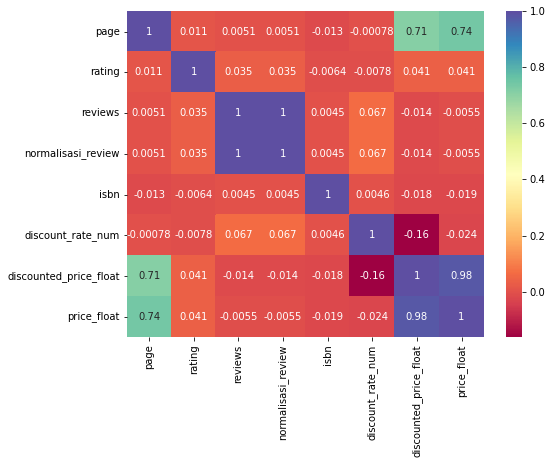

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

df_corr = data_new.corr()
sns.heatmap(df_corr, annot = True, cmap ='Spectral')